In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
pwd

'C:\\Users\\Admin'

In [3]:
data = pd.read_csv("C:\\Users\\Admin\\OneDrive\\Desktop\\Oasis Infobyte\\Advertising.csv")

In [4]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Check for missing values:

In [5]:
print("Missing value counts:")
print(data.isnull().sum())

Missing value counts:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


## Data Visualization:

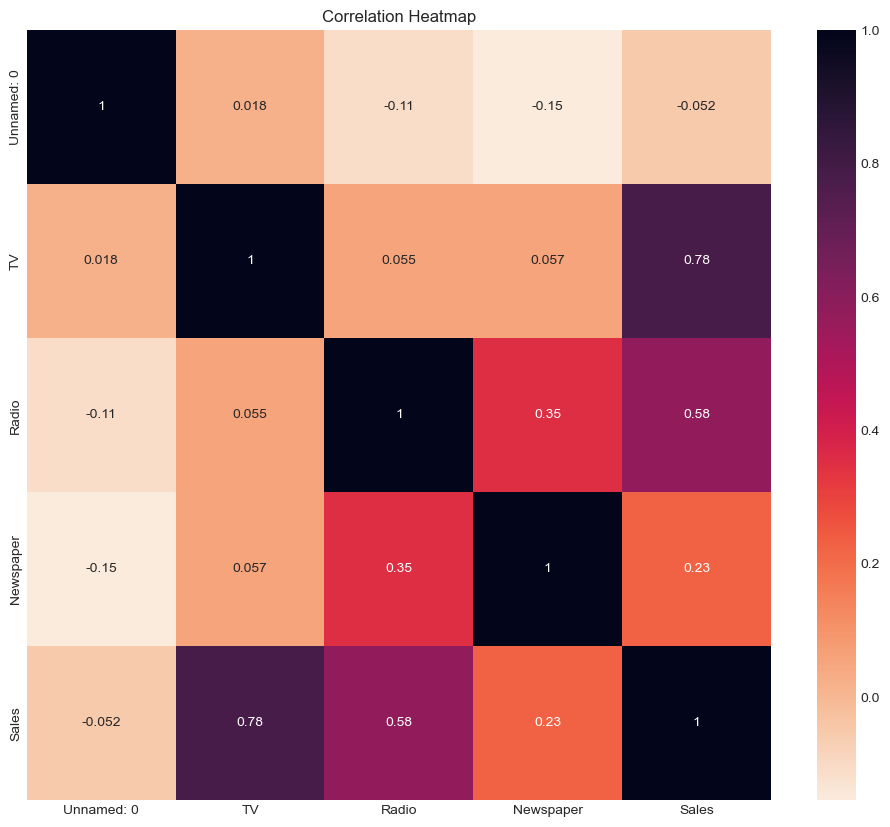

In [6]:
# Setting the style and creating a correlation heatmap
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (12, 10))
sns.heatmap(data.corr(), annot = True, cmap = 'rocket_r')
plt.title("Correlation Heatmap")
plt.show()

## Pairplot for visualization of relationships:

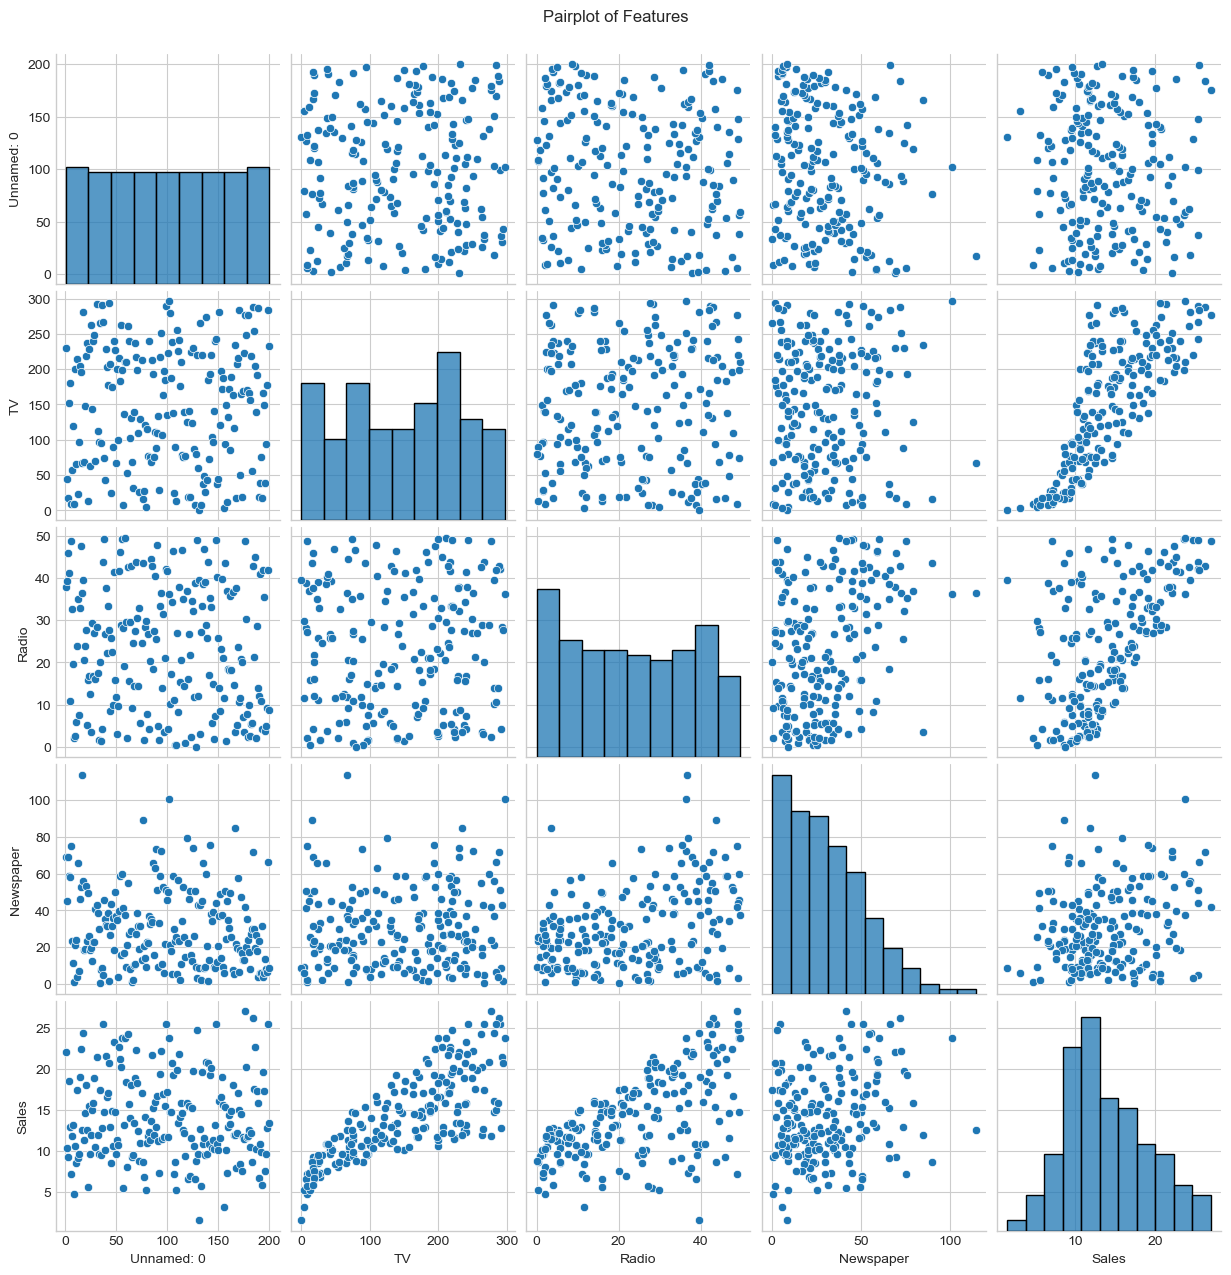

In [7]:
sns.pairplot(data)
plt.suptitle("Pairplot of Features", y = 1.02)
plt.show()

## Histogram of Sales:

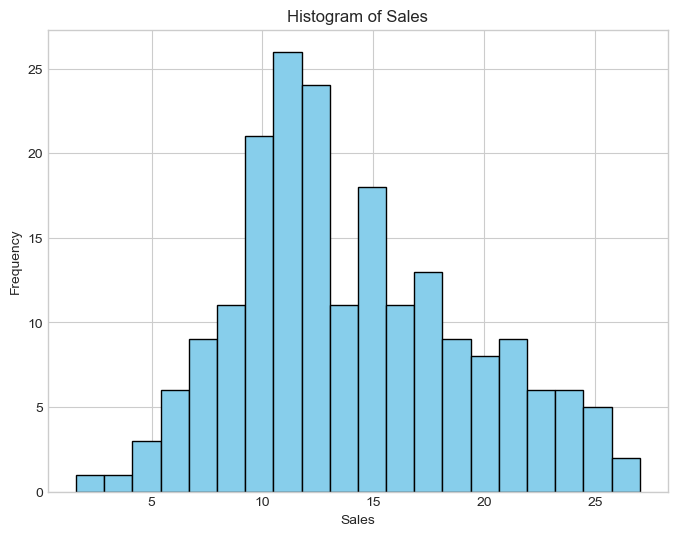

In [8]:
plt.figure(figsize = (8, 6))
plt.hist(data['Sales'], bins = 20, color = 'skyblue', edgecolor = 'black')
plt.title("Histogram of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

## Model building: 

In [9]:
# Preparing data for modeling
x = np.array(data.drop(["Sales"], axis = 1))
y = np.array(data["Sales"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Linear Regression Model:

In [10]:
# Training and evaluating Linear Regression model
print("Linear Regression Model")
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R-squared:", r2_score(y_test, y_pred_linear))

Linear Regression Model
Mean Squared Error: 3.1990044685889054
R-squared: 0.898648915141708


In [11]:
predicted_data = pd.DataFrame(data = {"Actual Sales": y_test, "Predicted Sales": y_pred_linear.flatten()})

# Displaying a sample of the DataFrame
print("Sample of Predicted vs Actual Sales:")
print(predicted_data.head(10))  # Displaying first 10 rows

Sample of Predicted vs Actual Sales:
   Actual Sales  Predicted Sales
0          16.9        16.412277
1          22.4        20.843193
2          21.4        21.511869
3           7.3        10.653100
4          24.7        22.124058
5          12.6        13.123835
6          22.3        21.037489
7           8.4         7.503854
8          11.5        13.647870
9          14.9        15.120409


## Decision Tree Model:

In [12]:
# Training and evaluating Decision Tree model
print("Decision Tree Model")
tree_model = DecisionTreeRegressor(random_state = 42)
tree_model.fit(x_train, y_train)
y_pred_tree = tree_model.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_tree))
print("R-squared:", r2_score(y_test, y_pred_tree))

Decision Tree Model
Mean Squared Error: 1.7627500000000005
R-squared: 0.9441524303613241


In [13]:
predicted_data = pd.DataFrame(data = {"Actual Sales": y_test, "Predicted Sales": y_pred_tree.flatten()})

# Displaying a sample of the DataFrame
print("Sample of Predicted vs Actual Sales:")
print(predicted_data.head(10))  # Displaying first 10 rows

Sample of Predicted vs Actual Sales:
   Actual Sales  Predicted Sales
0          16.9             19.2
1          22.4             21.2
2          21.4             18.9
3           7.3              7.2
4          24.7             23.8
5          12.6             13.3
6          22.3             22.6
7           8.4              9.7
8          11.5             12.2
9          14.9             14.1


## Random Forest Model:

In [14]:
# Training and evaluating Random Forest model
print("Random Forest Model")
forest_model = RandomForestRegressor(random_state = 42)
forest_model.fit(x_train, y_train)
y_pred_forest = forest_model.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_forest))
print("R-squared:", r2_score(y_test, y_pred_forest))

Random Forest Model
Mean Squared Error: 0.6769128999999989
R-squared: 0.9785539978317583


In [15]:
predicted_data = pd.DataFrame(data = {"Actual Sales": y_test, "Predicted Sales": y_pred_forest.flatten()})

# Displaying a sample of the DataFrame
print("Sample of Predicted vs Actual Sales:")
print(predicted_data.head(10))  # Displaying first 10 rows

Sample of Predicted vs Actual Sales:
   Actual Sales  Predicted Sales
0          16.9           17.649
1          22.4           21.646
2          21.4           20.622
3           7.3            6.639
4          24.7           22.952
5          12.6           13.469
6          22.3           22.327
7           8.4            9.733
8          11.5           11.809
9          14.9           15.464
